<a href="https://colab.research.google.com/github/HungPham2002/cifar10-classifcation-pytorch/blob/main/CIFAR10_Image_Classifcation_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Prepare data

In [3]:

data_path = '/content/drive/MyDrive/Colab_Notebooks/Basic Pytorch/Image_Classification_Pytorch/'

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
])

cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:14<00:00, 12050207.84it/s]


Extracting /content/drive/MyDrive/Colab_Notebooks/Basic Pytorch/Image_Classification_Pytorch/cifar-10-python.tar.gz to /content/drive/MyDrive/Colab_Notebooks/Basic Pytorch/Image_Classification_Pytorch/
Files already downloaded and verified


In [4]:
isinstance(cifar10, torch.utils.data.Dataset)

True

In [42]:
print(len(cifar10))
print(len(cifar10_val))

50000
10000


In [8]:
img, label = cifar10[0]

In [30]:
import cv2
from google.colab.patches import cv2_imshow

In [43]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,
                                           shuffle=True)

# Visualize data

In [55]:
# print(type(img))
# print(type(label))
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples) # Get a batch data
example_data.shape

torch.Size([64, 3, 32, 32])

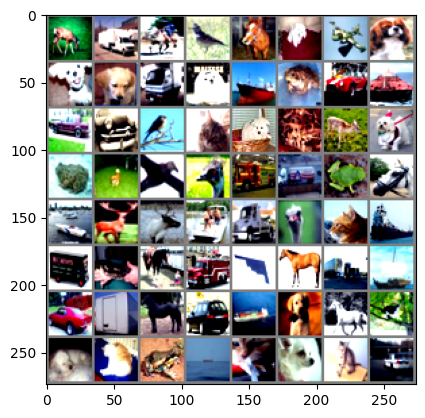

deer  truck horse bird  horse dog   plane dog   dog   dog   truck dog   ship  frog  car   ship  car   car   bird  cat   dog   frog  deer  dog   frog  dog   bird  bird  truck truck frog  horse ship  deer  deer  ship  truck bird  cat   ship  truck cat   horse truck plane horse truck ship  car   truck horse car   ship  dog   horse cat   dog   cat   frog  ship  cat   dog   cat   car  


In [56]:
def imshow(img):            # helper function
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

imshow(make_grid(example_data))
# print labels
print(' '.join(f'{classes[example_targets[j]]:5s}' for j in range(64))) # batch_size = 64

# Model building

In [36]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.maxpool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x):
    x = self.maxpool(F.relu(self.conv1(x)))
    x = self.maxpool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

model = Net()

# Predict label and calculate Loss

In [37]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

In [77]:
# debug
n_epochs = 3
train_losses = []
train_counter = []

In [58]:
def train(epoch):
  model.train()
  for batch_idx, (data, label) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()
    if batch_idx % 10  == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tloss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
          (batch_idx * 64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(model.state_dict(), '/content/drive/MyDrive/Colab_Notebooks/Basic Pytorch/Image_Classification_Pytorch/results/model_cifar10.pth')
      torch.save(optimizer.state_dict(), '/content/drive/MyDrive/Colab_Notebooks/Basic Pytorch/Image_Classification_Pytorch/results/optimizer_cifar10.pth')

In [79]:
def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad(): # "Turn off" gradient mode
    for data, label in test_loader:
      output = model(data)
      pred = output.data.max(1, keepdim = True)[1]
      correct += pred.eq(label.data.view_as(pred)).sum().item()

    print('\nTest set: Avg. Accuracy: {}/{} ({:.0f}%)\n'.format(
        correct, len(test_loader.dataset),
        100. * correct /  len(test_loader.dataset)
    ))

# Training

In [82]:
for epoch in range(1, n_epochs + 1):
  train(epoch)

Train Epoch: 1 [0/50000 (0%)]	loss: 1.246039
Train Epoch: 1 [640/50000 (1%)]	loss: 1.417708
Train Epoch: 1 [1280/50000 (3%)]	loss: 1.211646
Train Epoch: 1 [1920/50000 (4%)]	loss: 1.283680
Train Epoch: 1 [2560/50000 (5%)]	loss: 1.264691
Train Epoch: 1 [3200/50000 (6%)]	loss: 1.406210
Train Epoch: 1 [3840/50000 (8%)]	loss: 1.270193
Train Epoch: 1 [4480/50000 (9%)]	loss: 1.520480
Train Epoch: 1 [5120/50000 (10%)]	loss: 1.210413
Train Epoch: 1 [5760/50000 (12%)]	loss: 1.321765
Train Epoch: 1 [6400/50000 (13%)]	loss: 1.347058
Train Epoch: 1 [7040/50000 (14%)]	loss: 1.524556
Train Epoch: 1 [7680/50000 (15%)]	loss: 1.293663
Train Epoch: 1 [8320/50000 (17%)]	loss: 1.208283
Train Epoch: 1 [8960/50000 (18%)]	loss: 1.223297
Train Epoch: 1 [9600/50000 (19%)]	loss: 1.341817
Train Epoch: 1 [10240/50000 (20%)]	loss: 1.329736
Train Epoch: 1 [10880/50000 (22%)]	loss: 1.371599
Train Epoch: 1 [11520/50000 (23%)]	loss: 1.417539
Train Epoch: 1 [12160/50000 (24%)]	loss: 1.402647
Train Epoch: 1 [12800/50000 

In [83]:
test()


Test set: Avg. Accuracy: 5449/10000 (54%)



# Evaluate the model performance

Text(0, 0.5, 'negative log likelihood loss')

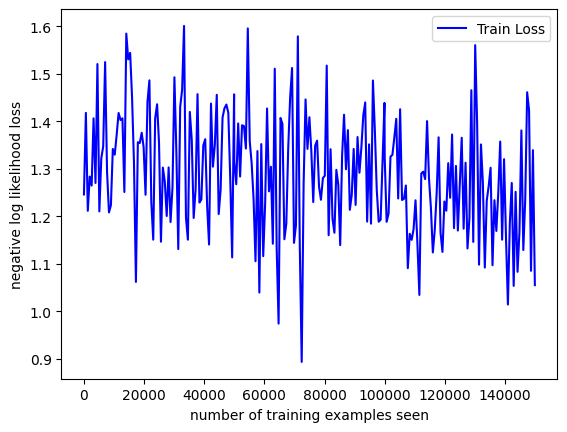

In [84]:
plt.plot(train_counter, train_losses, color='blue')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')


In [85]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1



for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for the class: {classname} is {accuracy} %')


Accuracy for the class: plane is 59.3 %
Accuracy for the class: car is 75.6 %
Accuracy for the class: bird is 36.0 %
Accuracy for the class: cat is 22.2 %
Accuracy for the class: deer is 35.9 %
Accuracy for the class: dog is 60.5 %
Accuracy for the class: frog is 74.2 %
Accuracy for the class: horse is 49.9 %
Accuracy for the class: ship is 71.8 %
Accuracy for the class: truck is 59.5 %


In [86]:
with torch.no_grad():
  output = model(example_data)

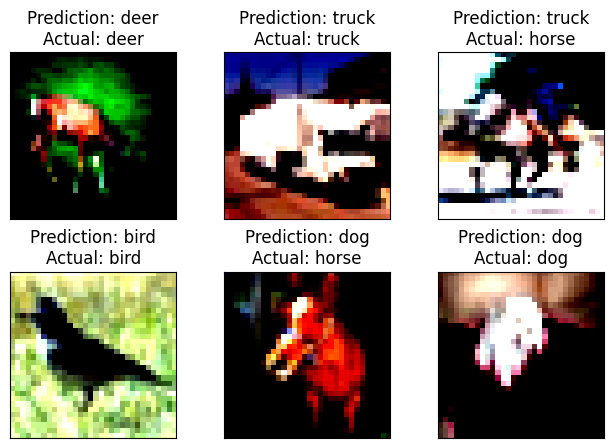

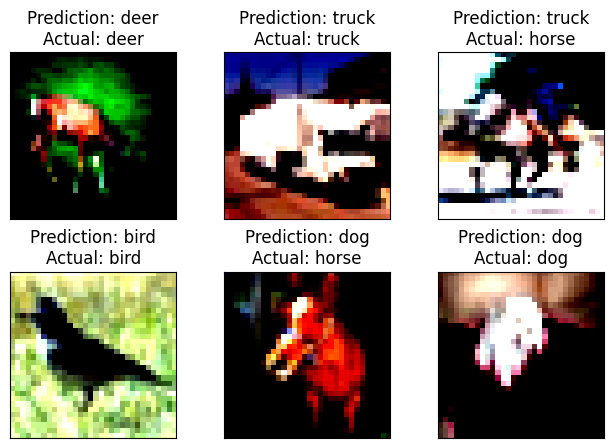

In [106]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(np.transpose(example_data[i], (1, 2, 0)))  # Transpose image matrix from (C, H, W) to (H, W, C)
  predicted_label = classes[output.data.max(1, keepdim=True)[1][i].item()]
  actual_label = classes[example_targets[i].item()]
  plt.title("Prediction: {}\nActual: {}".format(predicted_label, actual_label))
  plt.xticks([])
  plt.yticks([])
fig


# Continued Training from checkpoint

In [107]:
continued_network = Net()
continued_optimizer = optim.SGD(model.parameters(), lr=0.01,
                                momentum=0.9)

In [108]:
network_state_dict = torch.load('/content/drive/MyDrive/Colab_Notebooks/Basic Pytorch/Image_Classification_Pytorch/results/model_cifar10.pth')
continued_network.load_state_dict(network_state_dict)
optimizer_state_dict = torch.load('/content/drive/MyDrive/Colab_Notebooks/Basic Pytorch/Image_Classification_Pytorch/results/optimizer_cifar10.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

In [109]:
for i in range(4,10):
  train(i)
  test()

Train Epoch: 4 [0/50000 (0%)]	loss: 1.263007
Train Epoch: 4 [640/50000 (1%)]	loss: 1.032744
Train Epoch: 4 [1280/50000 (3%)]	loss: 1.172446
Train Epoch: 4 [1920/50000 (4%)]	loss: 1.276348
Train Epoch: 4 [2560/50000 (5%)]	loss: 1.204496
Train Epoch: 4 [3200/50000 (6%)]	loss: 1.304580
Train Epoch: 4 [3840/50000 (8%)]	loss: 1.260980
Train Epoch: 4 [4480/50000 (9%)]	loss: 1.443214
Train Epoch: 4 [5120/50000 (10%)]	loss: 1.486458
Train Epoch: 4 [5760/50000 (12%)]	loss: 1.103467
Train Epoch: 4 [6400/50000 (13%)]	loss: 1.077708
Train Epoch: 4 [7040/50000 (14%)]	loss: 1.118016
Train Epoch: 4 [7680/50000 (15%)]	loss: 1.230941
Train Epoch: 4 [8320/50000 (17%)]	loss: 1.215126
Train Epoch: 4 [8960/50000 (18%)]	loss: 1.372909
Train Epoch: 4 [9600/50000 (19%)]	loss: 1.341081
Train Epoch: 4 [10240/50000 (20%)]	loss: 1.272836
Train Epoch: 4 [10880/50000 (22%)]	loss: 1.150506
Train Epoch: 4 [11520/50000 (23%)]	loss: 1.192393
Train Epoch: 4 [12160/50000 (24%)]	loss: 1.375213
Train Epoch: 4 [12800/50000 

Text(0, 0.5, 'negative log likelihood loss')

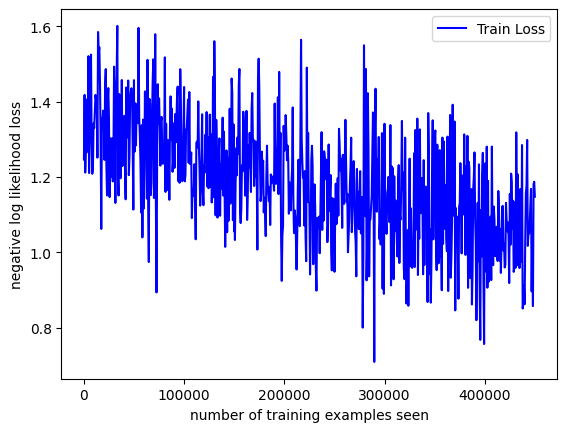

In [110]:
plt.plot(train_counter, train_losses, color='blue')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')


In [111]:
network_state_dict = torch.load('/content/drive/MyDrive/Colab_Notebooks/Basic Pytorch/Image_Classification_Pytorch/results/model_cifar10.pth')
continued_network.load_state_dict(network_state_dict)
optimizer_state_dict = torch.load('/content/drive/MyDrive/Colab_Notebooks/Basic Pytorch/Image_Classification_Pytorch/results/optimizer_cifar10.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

In [112]:
for i in range(10,21):
  train(i)
  test()

Train Epoch: 10 [0/50000 (0%)]	loss: 1.101900
Train Epoch: 10 [640/50000 (1%)]	loss: 1.196601
Train Epoch: 10 [1280/50000 (3%)]	loss: 1.065625
Train Epoch: 10 [1920/50000 (4%)]	loss: 1.027575
Train Epoch: 10 [2560/50000 (5%)]	loss: 0.968941
Train Epoch: 10 [3200/50000 (6%)]	loss: 0.924432
Train Epoch: 10 [3840/50000 (8%)]	loss: 0.799798
Train Epoch: 10 [4480/50000 (9%)]	loss: 1.191096
Train Epoch: 10 [5120/50000 (10%)]	loss: 1.071480
Train Epoch: 10 [5760/50000 (12%)]	loss: 0.972089
Train Epoch: 10 [6400/50000 (13%)]	loss: 1.060372
Train Epoch: 10 [7040/50000 (14%)]	loss: 1.261270
Train Epoch: 10 [7680/50000 (15%)]	loss: 1.020193
Train Epoch: 10 [8320/50000 (17%)]	loss: 1.188549
Train Epoch: 10 [8960/50000 (18%)]	loss: 0.905198
Train Epoch: 10 [9600/50000 (19%)]	loss: 0.887491
Train Epoch: 10 [10240/50000 (20%)]	loss: 1.059914
Train Epoch: 10 [10880/50000 (22%)]	loss: 1.129785
Train Epoch: 10 [11520/50000 (23%)]	loss: 1.005233
Train Epoch: 10 [12160/50000 (24%)]	loss: 0.998101
Train Ep

Text(0, 0.5, 'negative log likelihood loss')

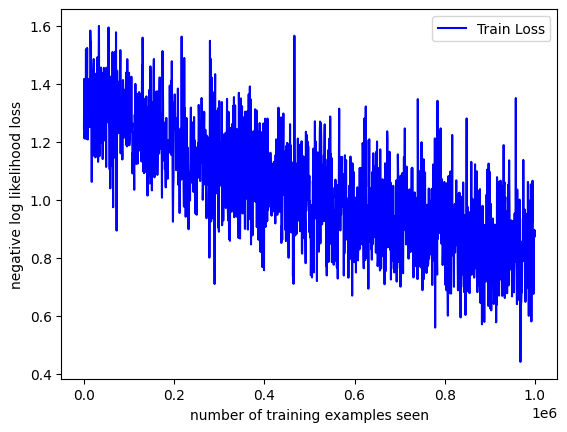

In [113]:
plt.plot(train_counter, train_losses, color='blue')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')